In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt

In [31]:
# 1. Load your data
print("Loading data...")
data = pd.read_csv('labeled_tax_data.csv')  # Replace with your file path

# Display first 5 rows to verify
data.head()

Loading data...


,hs_code,description,cd,sd,vat,ait,rd,at,tti,exd,schedule
0,01012100,Pure-bred breeding animals of horses..,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first schedule
1,01012900,Other horses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first schedule
2,01013000,Asses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first schedule
3,01019000,"LIVE HORSES,ASSES,MULES AND HINNIES,NES",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first schedule
4,01022100,Pure-bred breeding animals of cattle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first schedule


In [32]:
# 2. Prepare the data
print("\nPreparing data...")
# Features (what we use to predict)
X = data[['cd', 'sd', 'vat', 'ait', 'rd', 'at']]  
# Target (what we want to predict)
y = data['schedule']  


Preparing data...


In [33]:
# 3. Convert text labels to numbers (e.g., "first schedule" -> 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [34]:
# 4. Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [35]:
# 5. Train the model (Random Forest Classifier)
print("\nTraining model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Training model...


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# 6. Make predictions on test data
y_pred = model.predict(X_test)

In [37]:
# 7. Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))


Model Accuracy: 99.48%


In [38]:
# Detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

 first schedule       0.93      1.00      0.96       124
second schedule       1.00      1.00      1.00        21
tariff schedule       1.00      0.99      1.00      1409
 third schedule       1.00      1.00      1.00       190

       accuracy                           0.99      1744
      macro avg       0.98      1.00      0.99      1744
   weighted avg       1.00      0.99      0.99      1744



In [39]:
# 8. Feature Importance (which tax rates matter most?)
print("\nFeature Importance:")
importances = model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")


Feature Importance:
cd: 0.23
sd: 0.04
vat: 0.33
ait: 0.25
rd: 0.01
at: 0.15


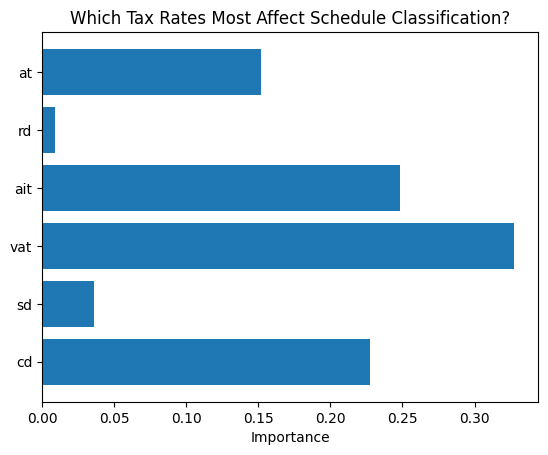

In [40]:
# 9. Visualize Feature Importance
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Which Tax Rates Most Affect Schedule Classification?')
plt.show()

In [41]:
# 10. Example Prediction
print("\nMaking a sample prediction...")
sample = pd.DataFrame({
    'cd': [0.0],
    'sd': [0.0],
    'vat': [15.0],
    'ait': [0.0],
    'rd': [0.0],
    'at': [0.0]
})
prediction = model.predict(sample)
print(f"Predicted Schedule: {label_encoder.inverse_transform(prediction)[0]}")


Making a sample prediction...
Predicted Schedule: second schedule


In [42]:
# Cell 7: Save the trained model
import joblib

# Save the model
joblib.dump(model, 'tax_classifier_model.pkl')

# Save the label encoder (important for decoding predictions)
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model saved as tax_classifier_model.pkl")
print("Label encoder saved as label_encoder.pkl")

Model saved as tax_classifier_model.pkl
Label encoder saved as label_encoder.pkl
